# Predicting Kings County (Washington State) House Prices

This project will use multivariate linear regression to create a model to predict houses prices in Kings County, WA, hopefully with a high degree of accuracy.  This will be accomplished by determining which variables of the 21 provided influence the value of a house the most.  

The data set has over 21,000 observations, spans a time period from May, 2014 to May, 2015 and comes from the official public records.

The steps that will be followed are as follows:
- Exploratory Data Analysis
- Data Cleaning
- Visualization
 - Create dummy variables, if needed
- Check for Multicorrelation
- Multivariate Linear Regression
 - Log Transformations to normalize data
 - Other Transformations 
- Create Models
- Cross validate with test-train set with best model
- Summary of Results


# Final Project Submission


* Student name: Annika Noren
* Student pace: part time 
* Scheduled project review date/time: August 29, 2019 @ 2:30pm EST
* Instructor name: Abhineet Kulkarni
* Blog post URL:


# Exploratory Data Analysis
I will use python commands and several libraries to load, view and study the Kings County Housing data set.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

In [2]:
df = pd.read_csv("kc_house_data.csv")

In [3]:
np.round(df.head())
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [6]:
print(df.shape)
print(df.isna().sum())

(21597, 21)
id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


## Column names and descriptions for Kings County Data Set

- id: unique identifier for a house
- date: when a house was sold
- price: prediction target
- bedrooms: the number of bedrooms
- bathrooms: the number of bathrooms
- sqft_living: the square footage of the house
- sqft_lot: the square footage of the lot
- floors: the number of levels in house
- waterfront: whether a house has a view to a waterfront or not
- view: number of times the house has been viewed
- condition: how good the house is overall, between 1 and 5
- grade: an overall score given to the house, based on King County grading system, between 0 and 13
- sqft_above: the square footage of house apart from basement
- sqft_basement: the square footage of the basement
- yr_built: the year the house was built 
- yr_renovated: the year when house was renovated
- zipcode: the zip
- lat: the latitude coordinate
- long: the longitude coordinate
- sqft_living15: square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15: square footage of the land lots of the nearest 15 neighbors


## Questions about the Data

After looking at the data in the EDA, there are some interesting questions that arise with will be investigated.

1. What could the meaning be behind the 3 scoring features: view, grade and condition? Who might be interested in such data?  Are the all meaningful or is one more impactful?

2. How does an increase in the square footage of living space affect the price of houses? 

3. How does the increase of the square footage of the lot affect the price of a houses?

4. Are median house prices similar across all zipcdes? 


### Response to Question 1

There are 3 features that provide some type of measure to evaluate the houses: views, grade and condition.  The view feature (how good was the view of the house with a range of 0-4) doesn't provide enough useful information.  There is no legend for what was evaluated and who the evaluators were. It is a subjective feature and will not be used in this linear regression.

The grade feature will also not be used in the liner regression because it is unclear why this a useful feature and what the values mean.  It is also unknown of how the numbering system for the feature works (1-5 values) and what beneficial information it provides to investors.  

The condition feature, however, is a value assigned by Kings County to quantify the house and is official.  It ranks houses on a scale of 0 to 13, where 1-3 falls short of building construction and design, 7 is an average house in construction and design, and 11-13 indicates a high quality.  This last feature is the most useful of all three evaluation numbers and should be the one used.

### Response to Question 2
Based on the scatter plot below: yes, the price of a house does increase when the square foot living increases. In fact it is a very positive linear correlation.

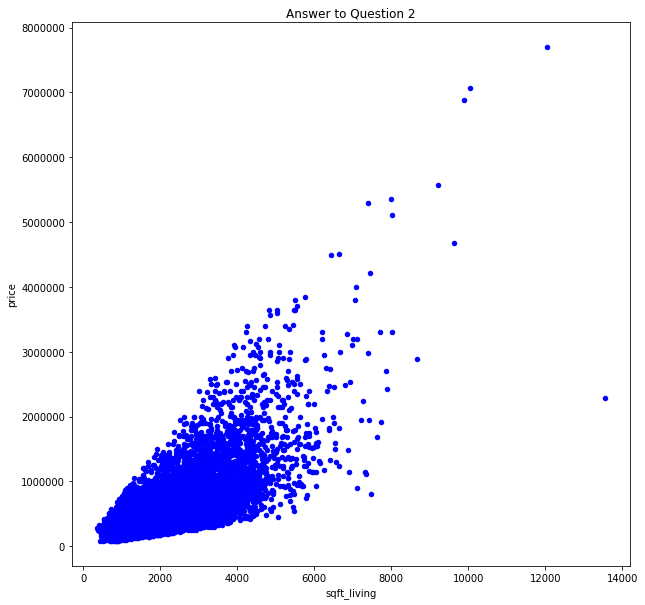

In [7]:
df.plot.scatter(x='sqft_living', y='price', c='blue', figsize=(10,10), title="Answer to Question 2")

### Response to Question 3
Based on the scatter plot below, an increase in the square footage of the lot is not a linear correlation to the price. At least not as defined as plot above (the square foot of living space to price.)  

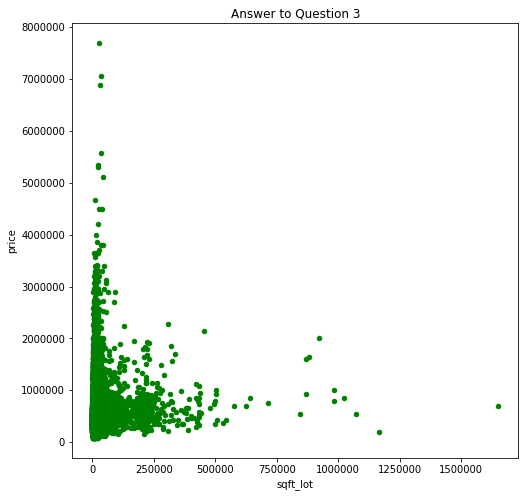

In [8]:
df.plot.scatter(x='sqft_lot', y='price', c='green', figsize=(8,8), title = "Answer to Question 3")

### Response to Question 4
There does appear to be a relationship between the mean house prices and the zip code.  The zip code of 98039 has a much higher mean house price than the next zip code.  Clearly, zip codes matter and certain areas are more desirable to live in.

Text(0.5, 0, 'Mean prices of homes')

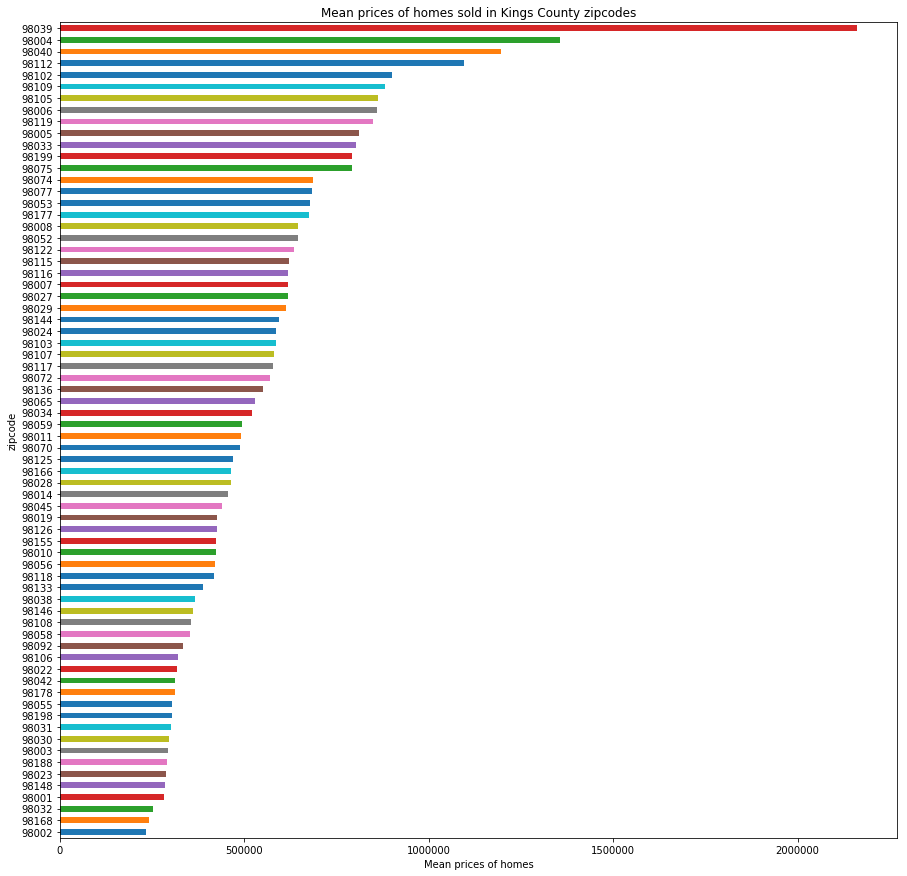

In [9]:
# Zipcode and median house price bar graph
df.groupby(['zipcode'])['price'].mean().sort_values().plot(kind='barh', figsize=(15,15))
plt.title('Mean prices of homes sold in Kings County zipcodes')
plt.xlabel("Mean prices of homes")


### Distribution of Price (the target)
As can be seen below, the distribution of the house prices is fairly normal with a slight skew to the right with the outliers.   

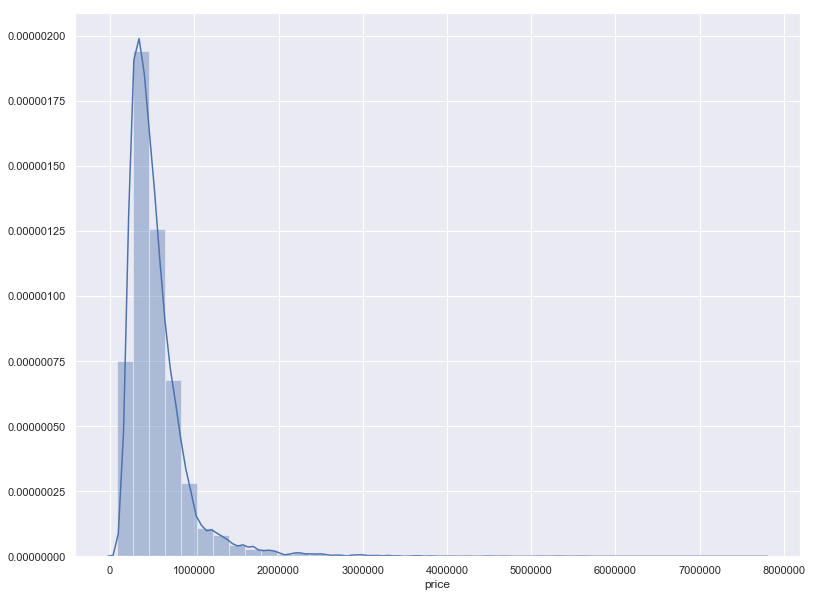

In [10]:
sns.set(rc={'figure.figsize':(13,10)})
sns.distplot(df['price'], bins=40)
plt.show()

### Simple Linear Regression
Before moving forward, it is interesting to look at the linear regressions of one feature and the price. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~bedrooms


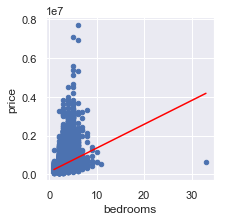

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~bathrooms


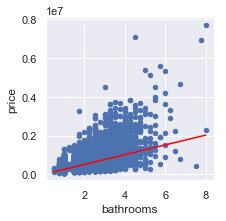

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~sqft_living


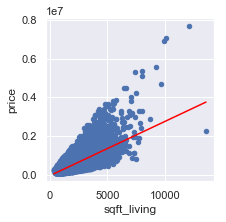

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~sqft_lot


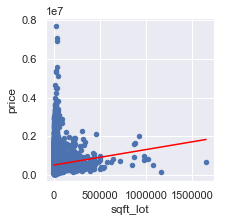

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~floors


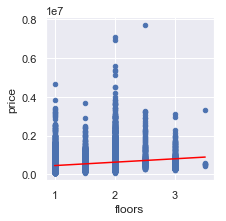

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~waterfront


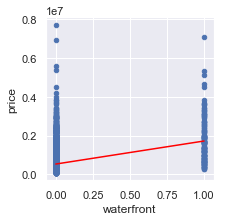

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~view


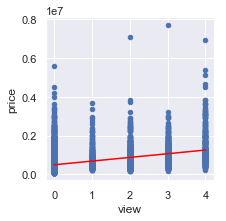

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~condition


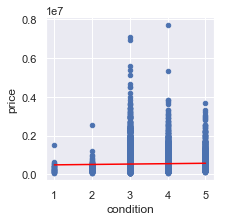

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~grade


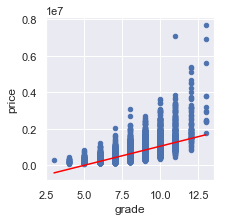

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~sqft_above


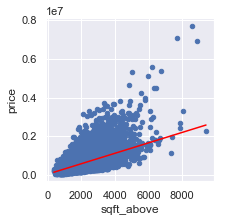

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~yr_built


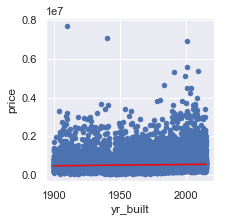

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~zipcode


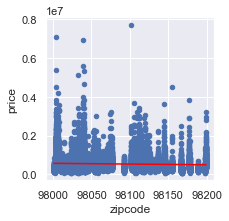

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~lat


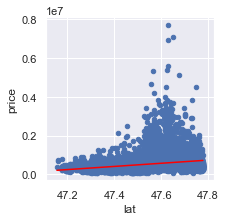

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~long


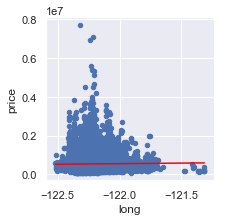

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~sqft_living15


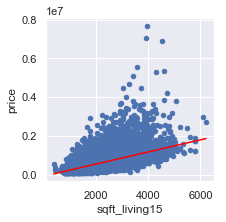

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


King County Data Set - Regression Analysis for price~sqft_lot15


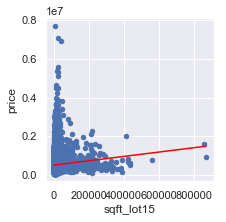

In [11]:
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]
   
    
for i, val in enumerate(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                        'waterfront','view','condition','grade','sqft_above',
                        'yr_built','zipcode','lat','long','sqft_living15','sqft_lot15']):
    print ("King County Data Set - Regression Analysis for price~" + val)
    
    f = 'price~' + val
    model = ols(formula=f, data=df).fit()
    
    new_val = pd.DataFrame({val : [df[val].min(),df[val].max()]})
    predictions = model.predict(new_val)
    df.plot(kind='scatter', x = val, y = 'price',figsize=(3,3))
    plt.plot(new_val,predictions,color='red')
    plt.show()
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])
    

In [12]:
pd.DataFrame(results)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,bedrooms,0.0953497,127200,122464,0,1.1951e+06
2,bathrooms,0.276577,8712.65,251242,0,882736
3,sqft_living,0.492688,-43988.9,280.863,0,542663
4,sqft_lot,0.00807774,528258,0.797285,5.57162e-40,1.14771e+06
5,floors,0.0659481,279115,174809,0,1.25575e+06
6,waterfront,0.0763391,532642,1.18457e+06,0,894387
7,view,0.156605,495813,189193,0,1.00377e+06
8,condition,0.00130006,470868,20361.3,1.15656e-07,1.1368e+06
9,grade,0.446158,-1.06142e+06,209158,0,2.0439e+06


From the graph and and the dataframe results, price has the highest correlation to square foot of living space at 0.50, followed by grade, sqft_living15, sqft_above and bathrooms.

## Summary of EDA
Kings County Housing Sales is a large data set with 21,597 rows of data and 21 columns of features.  The features describe each houses by providing the number of bedrooms, bathrooms, the lot size, living space, basement space, zipcode, map location, about the neighbors and several different evaluation systems.  The target feature in this data set is the price.  

After looking at the information, there appears to be: missing data, duplicate data, incorrect datatypes, categorical data and suspicious outlier data. This will be investigated in the next section. 

# Data Cleaning

There appears to be data that is missing, extraneous, duplicate, categorical, suspicious outliers and incorrect datatypes.  

## Fix Data Types
Some of the features have the incorrect data type.  The ones to be fixed are: 
- date
- zipcode  

Four others - yr_renovated, view, waterfront and sqft_basement - will be fixed further along in the cleaning process.

In [13]:
# Date datatype changed from str to datetime64
df['date'] =  pd.to_datetime(df['date'], format='%m/%d/%Y')

# Find start and stop date of data collection
dates = df['date']
dates = sorted(dates)
print(dates[0], dates[-1])

2014-05-02 00:00:00 2015-05-27 00:00:00


In [14]:
# zipcode datatype changed from int to string
from collections import Counter
df['zipcode'] = df['zipcode'].astype('str')

In [15]:
# My plan was to group the zip codes into 4 or 5 bins to create dummy variables for them, but I was unable to 
# accomplish that with code.  I would have grouped the zipcodes based on the median house price.  Higher median
# house prices would have been grouped together and zipcodes with lower median house prices would have been
# grouped together.
#
# I also thought it would have been cool to try and plot the zipcodes (there are 70 unique ones) on a map.  Again,
# I was unable to accomplish that with code.
#
df['zipcode'].unique()
a = Counter(df['zipcode'])
# I was able to count how many houses were sold in each zipcode.
print(a)

Counter({'98103': 602, '98038': 589, '98115': 583, '98052': 574, '98117': 553, '98042': 547, '98034': 545, '98118': 507, '98023': 499, '98006': 498, '98133': 493, '98059': 468, '98058': 455, '98155': 446, '98074': 441, '98033': 432, '98027': 412, '98125': 409, '98056': 406, '98053': 403, '98001': 361, '98075': 359, '98126': 354, '98092': 351, '98144': 343, '98106': 335, '98116': 330, '98029': 321, '98004': 317, '98199': 317, '98065': 308, '98122': 290, '98146': 288, '98028': 283, '98008': 283, '98040': 282, '98003': 280, '98198': 280, '98031': 273, '98072': 273, '98112': 269, '98168': 269, '98055': 268, '98107': 266, '98136': 263, '98178': 262, '98030': 256, '98177': 255, '98166': 254, '98022': 233, '98105': 229, '98045': 220, '98002': 199, '98077': 198, '98011': 195, '98019': 190, '98108': 186, '98119': 184, '98005': 168, '98007': 141, '98188': 136, '98032': 125, '98014': 124, '98070': 117, '98109': 109, '98102': 104, '98010': 100, '98024': 80, '98148': 57, '98039': 50})


In [16]:
# Heat Map to show distribution of houses sold 
import folium
from folium import plugins

# Map of the Washington State, Kings County area
latitude = 47.5480
longitude = -121.9836
KC_map = folium.Map(location=[latitude, longitude], zoom_start=8)

# Marker is Seattle
marker = folium.CircleMarker(location = [47.5112, -122.257],radius=10, color='red')
marker.add_to(KC_map)

# Here was my start at adding a marker for each house.  The next step would have been figuring out how
# to read the latitude and longitude from the dataframe.
#
# latlon = [ (47.5112,-122.257 ), (47.7210, -122.319)]

# for coord in latlon:
#     marker = folium.CircleMarker(location=[coord[0], coord[1] ], radius=1 )
#     marker.add_to(KC_map)

# for index, row in df.iterrows():
#     folium.CircleMarker([row['lat'], row['long']],
#                         radius=1,
#                         popup=row['zipcode'], 
#                        ).add_to(KC_map)   
    

# This code, however, was copied from https://alysivji.github.io/getting-started-with-folium.html

stationArr = df[['lat', 'long']].as_matrix()

# plot heatmap
KC_map.add_children(plugins.HeatMap(stationArr, radius=15))   
    
KC_map

Since I was uable to figure out how to relate zipcode with latitude and longitude, or how to create only 5 dummy variables for zipcodes (by grouping many zipcodes together in one bin), none of the zipcdoe, latitude and longitude features will be used in the regression.

## Extraneous Data
There are three features - sqft_living, sqft_above and sqft_basement - that are redundant. Let's take a look at the basement data.

In [17]:
print(df['sqft_basement'].nunique())
print(df.sqft_basement.value_counts().head())

304
0.0      12826
?          454
600.0      217
500.0      209
700.0      208
Name: sqft_basement, dtype: int64


Only about half of the houses in the data set have basements and a very small percentage of houses have missing values (2%).  If a house has a basement, the basement living space is accounted for by the variable total square footage.  Therefore, the two variables, sqft_basement and sqft_above, will not be used for the regression model and the missing values in sqft_basement will not be fixed.  Another option would have been to delete the ? basement values.  However, the information provided by sqft_basement didn't seem that impactful.

## Missing Data
Based on the EDA, there are 3 features missing data: view, waterfront (indicates if the house has a waterview or not) and yr_renovated.  

In [18]:
# The view feature
#print(df['view'].nunique())#5
print(df['view'].value_counts())
print(df['view'].isna().sum())

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
63


There are 5 categories (0 to 4 viewings) for the view variable with 63 null values. Since there is such a small number of null values and large number of 0 views, the null values could be converted to zero and then the datatype changed to int.  However, this feature will not be used in the regression so the cleaning isn't needed.

In [19]:
# This is how I would accomplished cleaning the view feature.
#
# Converting null values to 0 and changing the datatype
# df['view'] = df['view'].fillna(value= 0)
# df['view'] = df['view'].astype('int')

In [20]:
# The waterfront feature
print(df['waterfront'].value_counts()) #Assume 1 is waterfront view and 0 not a view
print(df['waterfront'].isna().sum())

0.0    19075
1.0      146
Name: waterfront, dtype: int64
2376


There are 19,00+ properties with a '0' for waterfront, 146 with a '1' and about 2,000 with no value. Which means only 0.77% of the properties have waterfront. Therefore, the null values will be converted to 0 and the datatype changed to int.

In [21]:
# Looking at yr_renovated
print("Number of unique values: ", df['yr_renovated'].nunique())
print(df['yr_renovated'].value_counts().head())
print('Number of null values: ', df['yr_renovated'].isna().sum())

Number of unique values:  70
0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64
Number of null values:  3842


There are about 3,800 missing values - about 20% the total data set. It is not ideal to delete the data based on this feature and lose 20% of the data.  Since most houses did not have a renovation done, the null values will be set to 0. I would have liked to divide up the 3,800 into the proper percentage of renovation/norenovation, but then would have had to deal with the value to use.  In the end, it seemed easier to use 0.

In [22]:
df['yr_renovated'] = df['yr_renovated'].fillna(value=0)
df['yr_renovated'] = df['yr_renovated'].astype('int')

## Duplicate Data
Since there are id numbers for each house, it is a good idea to be sure id numbers weren't duplicated incorrectly.

In [23]:
print("Number of unique property ids: ", df['id'].nunique()) #there could be duplicated data
print(df['id'].value_counts().head(3)) #there is one triplicate data, the many other duplicates

Number of unique property ids:  21420
795000620     3
1825069031    2
2019200220    2
Name: id, dtype: int64


In [24]:
duplicates = df[df.duplicated(subset='id')] 
print('There are {} occurances of duplicate house id numbers.'.format(len(duplicates))) #177 occurances of 21597
percent = round(len(duplicates) / len(df), 3) * 100
print('Percent of data that is duplicate: ', percent)

There are 177 occurances of duplicate house id numbers.
Percent of data that is duplicate:  0.8


Three houses have the same id, it is advisable to see if it is duplicate data or not.  If the data is the same, the duplicate rows can be deleted.  Otherwise, we can keep the duplicated rows.

In [25]:
dupl_data = pd.read_csv("kc_house_data.csv", index_col ="id") 
rows = dupl_data.loc[795000620] 
print(rows)

                 date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id                                                                            
795000620   9/24/2014  115000.0         3        1.0         1080      6250   
795000620  12/15/2014  124000.0         3        1.0         1080      6250   
795000620   3/11/2015  157000.0         3        1.0         1080      6250   

           floors  waterfront  view  condition  grade  sqft_above  \
id                                                                  
795000620     1.0         0.0   0.0          2      5        1080   
795000620     1.0         0.0   0.0          2      5        1080   
795000620     1.0         NaN   0.0          2      5        1080   

          sqft_basement  yr_built  yr_renovated  zipcode      lat    long  \
id                                                                          
795000620           0.0      1950           0.0    98168  47.5045 -122.33   
795000620           0.0    

It apprears that the duplicate id is the case where the same house was re-sold multiple times. The house with 3 entries in the data set sold in Septermber of 2014, December of 2014 and March of 2015.  No duplicate data will be deleted. 

## Outliers
From the summary in the EDA, a few strange data points stood out.  In particular the house with 33 bedrooms and the one with 8 bathrooms (two seperate properties.)  

In [26]:
bed_outlier = df.loc[df['bedrooms'] > 10]
bath_outlier = df.loc[df['bathrooms'] > 7]
print("Bedroom outliers: ")
print(bed_outlier)
print('-----------------')
print("Bathroom outliers: ")
print(bath_outlier)

Bedroom outliers: 
               id       date     price  bedrooms  bathrooms  sqft_living  \
8748   1773100755 2014-08-21  520000.0        11       3.00         3000   
15856  2402100895 2014-06-25  640000.0        33       1.75         1620   

       sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
8748       4960     2.0         0.0   0.0     ...          7        2400   
15856      6000     1.0         0.0   0.0     ...          7        1040   

       sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
8748           600.0     1918          1999    98106  47.5560 -122.363   
15856          580.0     1947             0    98103  47.6878 -122.331   

       sqft_living15  sqft_lot15  
8748            1420        4960  
15856           1330        4700  

[2 rows x 21 columns]
-----------------
Bathroom outliers: 
               id       date      price  bedrooms  bathrooms  sqft_living  \
7245   6762700020 2014-10-13  7700000.0         6       8

There are a handful of homes that have a very high number of bedrooms and bathrooms. There is no way of being sure if the data is accurate or not.  The only property that is probably has incorrect data is the one with 33 bedrooms.  Given that there are less than 2 full baths associated with that particular property is likely that '33' was supposed to be entered as '3'.  Therefore, one data point will be changed, but all other date will be remain. 

The property that has 8 bathrooms actually has 7 bedrooms so it may be a bed/breakfast rental and seems like legitimate data.

In [27]:
df.bedrooms = df.bedrooms.replace({33: 3})
#print(df.loc[df['id'] == 2402100895])

### Checking on Price outliers
Just to be sure, a check on the outliers in the price variable. 

In [28]:
print("Statistics of price variable: ")
print(df.price.describe())
print("-----------------")
print("Statistics of sqft_living variable: ")
print(df.sqft_living.describe())
print('-----------------')
price_outlier = df.loc[df['price'] >= 5000000]
print("Number of properties over $5,000,000: ", len(price_outlier))
print(price_outlier[['price','bedrooms','bathrooms','sqft_living']])

Statistics of price variable: 
count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64
-----------------
Statistics of sqft_living variable: 
count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64
-----------------
Number of properties over $5,000,000:  7
          price  bedrooms  bathrooms  sqft_living
1162  5110000.0         5       5.25         8010
1313  5300000.0         6       6.00         7390
1446  5350000.0         5       5.00         8000
3910  7060000.0         5       4.50        10040
4407  5570000.0         5       5.75         9200
7245  7700000.0         6       8.00        12050
9245  6890000.0         6       7.75         9890


Based on a quick look, the outliers don't seem incorrect or unreasonable.  Additionally, the distribution of the price feature was looked at in the EDA and there was evidence of several outliers there.  And the higher priced houses were seem in the zipcode bar graph.

# Result of Cleaning 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(7), int64(11), object(2)
memory u

Moving ahead, the following features will be excluded from the linear regression:
- id
- date
- view               
- condition           
- sqft_above          
- sqft_basement       
- zipcode             
- lat                 
- long                


# Data Visualizations 

Following are scatterplots to identify the categorial features. Some features do not represent a continues number, but a class or state.  

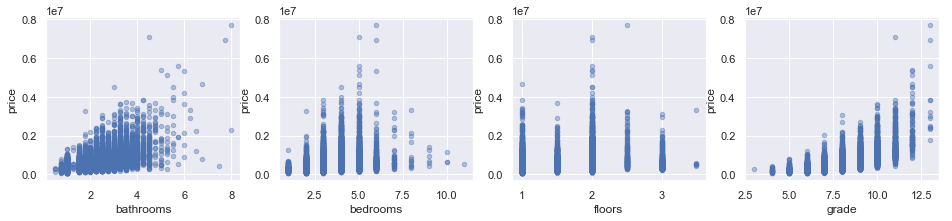

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))

for xcol, ax in zip(['bathrooms', 'bedrooms','floors','grade'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')    

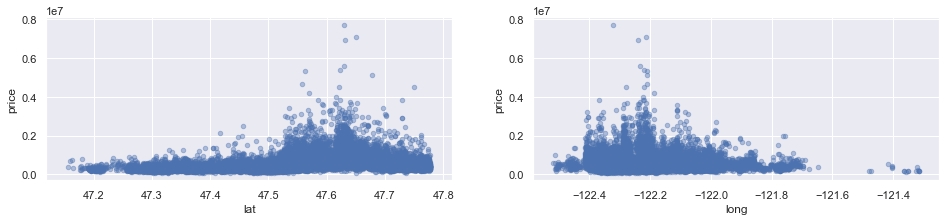

In [31]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,3))

for xcol, ax in zip(['lat','long'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')  

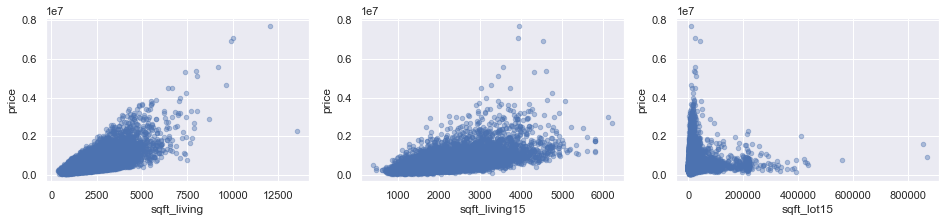

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))

for xcol, ax in zip(['sqft_living','sqft_living15','sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b') 

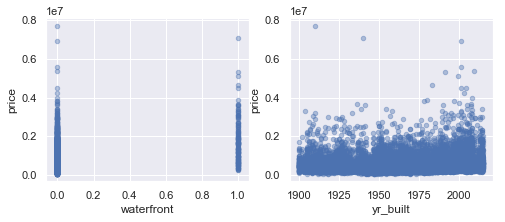

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,3))

for xcol, ax in zip(['waterfront','yr_built'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b') 

### Creating dummy variables for Waterfront

In [34]:
waterfront_dummy = pd.get_dummies(df["waterfront"], prefix="W")
waterfront_dummy.head()

,W_0.0,W_1.0
0,0,0
1,1,0
2,1,0
3,1,0
4,1,0


In [35]:
# df_categories = pd.concat([waterfront_dummy, condition_dummy], axis=1)
# df_categories.head()

### Creating bins for grades

There are 11 grades, with 3 being the lowest number and 13 the highest. There is no 0 or 1.  

In [36]:
print("Unique number of grades: ", df["grade"].nunique())
print('------------------------')
print(df.grade.value_counts())
print('------------------------')
print("Median grade value: ", df.grade.median())

Unique number of grades:  11
------------------------
7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64
------------------------
Median grade value:  7.0


In [37]:
gr_bins = [3, 7, 13]
bins_grade = pd.cut(df['grade'], gr_bins)
bins_grade = bins_grade.cat.as_ordered()
bins_grade.head()

0     (3, 7]
1     (3, 7]
2     (3, 7]
3     (3, 7]
4    (7, 13]
Name: grade, dtype: category
Categories (2, interval[int64]): [(3, 7] < (7, 13]]

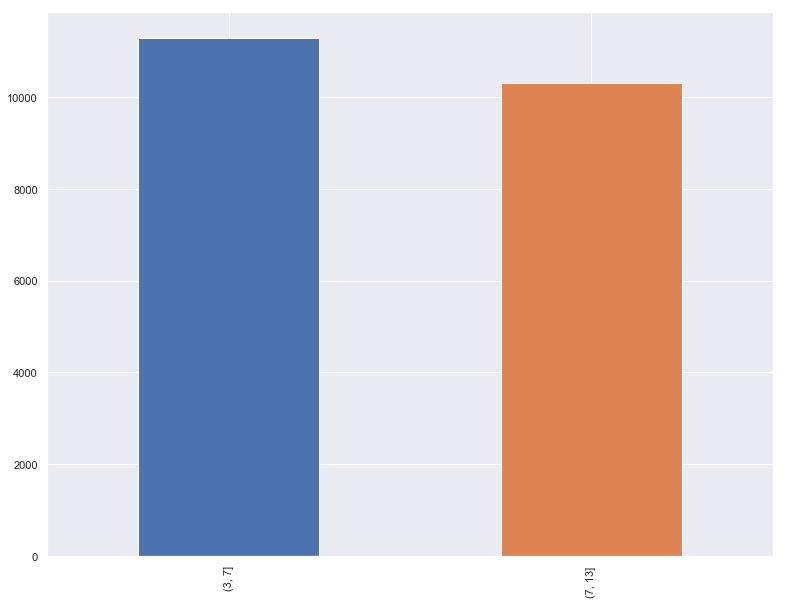

In [38]:
bins_grade.value_counts().plot(kind='bar')

In [39]:
grade_dummy = pd.get_dummies(gr_bins, prefix="G")

### Creating bins for zipcodes

In [40]:
# My attempt at creating bins for zipcodes
#
# zips = df["zipcode"].unique()
# zips1 = ['98178', '98125', '98028', '98136', '98074', '98053', '98003',
#        '98198', '98146', '98038', '98007', '98115', '98107', '98126',
#        '98019', '98103', '98002', '98133', '98040', '98092', '98030',
#        '98119', '98112', '98052', '98027', '98117', '98058', '98001',
#        '98056', '98166', '98023', '98070', '98148', '98105', '98042']
# zips2 = ['98008', '98059', '98122', '98144', '98004', '98005', '98034',
#        '98075', '98116', '98010', '98118', '98199', '98032', '98045',
#        '98102', '98077', '98108', '98168', '98177', '98065', '98029',
#        '98006', '98109', '98022', '98033', '98155', '98024', '98011',
#        '98031', '98106', '98072', '98188', '98014', '98055', '98039']
# zips_series1 = pd.Series(zips1)
# zips_series2 = pd.Series(zips2)
# cat_zips1 = zips_series1.astype('category')
# cat_zips2 = zips_series2.astype('category')
# print(cat_zips1,cat_zips2)
# cat_zips1.cat.codes
# cat_zips2.cat.codes

In [41]:
# pd.get_dummies(cat_zips1)
# pd.get_dummies(cat_zips2)

In [42]:
# The features to be used for linear regression
df_features = df[['bedrooms', 'bathrooms', 'sqft_living','sqft_lot','floors','yr_built',
                  'yr_renovated','zipcode', 'sqft_living15', 'sqft_lot15']].copy()
df_target = df['price']

In [43]:
# Add the dummy variables
df_features = pd.concat([df_features, waterfront_dummy,grade_dummy], axis=1)
print(df_target.head())
print(df_features.head())

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64
   bedrooms  bathrooms  sqft_living  sqft_lot  floors  yr_built  yr_renovated  \
0         3       1.00         1180      5650     1.0      1955             0   
1         3       2.25         2570      7242     2.0      1951          1991   
2         2       1.00          770     10000     1.0      1933             0   
3         4       3.00         1960      5000     1.0      1965             0   
4         3       2.00         1680      8080     1.0      1987             0   

  zipcode  sqft_living15  sqft_lot15  W_0.0  W_1.0  G_3  G_7  G_13  
0   98178           1340        5650      0      0  1.0  0.0   0.0  
1   98125           1690        7639      1      0  0.0  1.0   0.0  
2   98028           2720        8062      1      0  0.0  0.0   1.0  
3   98136           1360        5000      1      0  NaN  NaN   NaN  
4   98074           1800        7503      1      0  NaN  NaN   NaN  


# Check for Multicollinearity
Before moving to log transformations and normalizations, I'll check for mulitcollinearity between the features in the newly created features data frame.

In [44]:
df_features.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,sqft_living15,sqft_lot15,W_0.0,W_1.0,G_3,G_7,G_13
bedrooms,1.000000,0.527874,0.593182,0.033606,0.183721,0.160748,0.018629,0.404540,0.031898,0.004419,-0.002053,0.500000,0.500000,-1.000000
bathrooms,0.527874,1.000000,0.755758,0.088373,0.502582,0.507173,0.047177,0.569884,0.088303,-0.011744,0.063629,-0.500000,1.000000,-0.500000
sqft_living,0.593182,0.755758,1.000000,0.173453,0.353953,0.318152,0.051060,0.756402,0.184342,-0.020362,0.104637,-0.299870,0.976106,-0.676236
sqft_lot,0.033606,0.088373,0.173453,1.000000,-0.004814,0.052946,0.004979,0.144763,0.718204,-0.007191,0.021459,-0.779370,-0.152936,0.932306
floors,0.183721,0.502582,0.353953,-0.004814,1.000000,0.489193,0.003793,0.280102,-0.010722,-0.000505,0.020797,-0.500000,1.000000,-0.500000
yr_built,0.160748,0.507173,0.318152,0.052946,0.489193,1.000000,-0.202555,0.326377,0.070777,0.010033,-0.024487,0.640464,0.344865,-0.985329
yr_renovated,0.018629,0.047177,0.051060,0.004979,0.003793,-0.202555,1.000000,0.000683,0.004286,-0.026859,0.073939,-0.500000,1.000000,-0.500000
sqft_living15,0.404540,0.569884,0.756402,0.144763,0.280102,0.326377,0.000683,1.000000,0.183515,-0.018332,0.083823,-0.696156,-0.273634,0.969789
sqft_lot15,0.031898,0.088303,0.184342,0.718204,-0.010722,0.070777,0.004286,0.183515,1.000000,-0.002904,0.030658,-0.986425,0.350998,0.635427
W_0.0,0.004419,-0.011744,-0.020362,-0.007191,-0.000505,0.010033,-0.026859,-0.018332,-0.002904,1.000000,-0.226888,-1.000000,0.500000,0.500000


In [45]:
abs(df_features.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,sqft_living15,sqft_lot15,W_0.0,W_1.0,G_3,G_7,G_13
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,True
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,True,False
sqft_living,False,True,True,False,False,False,False,True,False,False,False,False,True,False
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,True,False,True
floors,False,False,False,False,True,False,False,False,False,False,False,False,True,False
yr_built,False,False,False,False,False,True,False,False,False,False,False,False,False,True
yr_renovated,False,False,False,False,False,False,True,False,False,False,False,False,True,False
sqft_living15,False,False,True,False,False,False,False,True,False,False,False,False,False,True
sqft_lot15,False,False,False,False,False,False,False,False,True,False,False,True,False,False
W_0.0,False,False,False,False,False,False,False,False,False,True,False,True,False,False


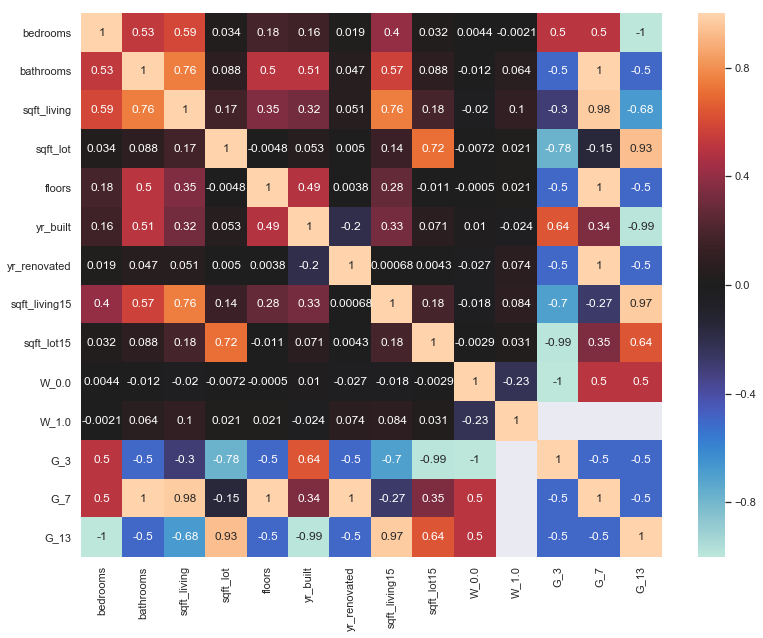

In [46]:
sns.heatmap(data=df_features.corr(), annot=True, center=0)

## Multicollinearity Result
There are several features that are problematic: sqft_living (4 trues), G_3 (4 trues), G_7 (5 trues) and G_13 (5 trues).  

Three iterations of multivariate linear regression will be performed.  In the first iteration, sqft_living and the 3 grade features will be excluded.  In the second iteration, sqft_living will be added back in without grade.  In the third iteration, sqft_above will be used instead of sqft_living even though I said it was redundant in my EDA.

## Multivariate Linear Regression - First Round

Start with log transformations to normalize the data. 

A look at the histograms of the data for the features.  Sqft_living and grade will be dropped from the features because of multicollinearity. 

   bedrooms  bathrooms  sqft_lot  floors  yr_built  yr_renovated zipcode  \
0         3       1.00      5650     1.0      1955             0   98178   
1         3       2.25      7242     2.0      1951          1991   98125   
2         2       1.00     10000     1.0      1933             0   98028   
3         4       3.00      5000     1.0      1965             0   98136   
4         3       2.00      8080     1.0      1987             0   98074   

   sqft_living15  sqft_lot15  W_0.0  W_1.0  
0           1340        5650      0      0  
1           1690        7639      1      0  
2           2720        8062      1      0  
3           1360        5000      1      0  
4           1800        7503      1      0  


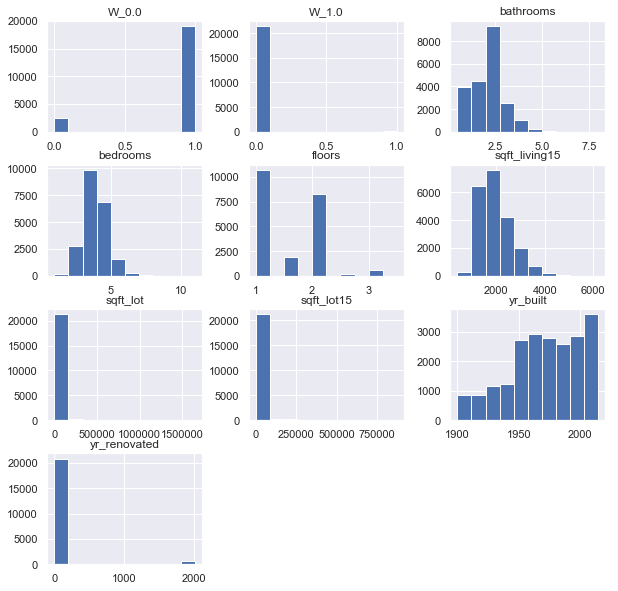

In [47]:
df_version1 = df_features.drop(['sqft_living','G_13','G_3','G_7'],axis=1)
print(df_version1.head())
df_version1.hist(figsize  = [10,10]);

### Log transformations
Log transformations will be done on the following data: bathrooms, bedrooms, floors, sqft_living15, sqft_lot, sqft_lot15, yr_built.  A log transformation will not be done on yr_renovated (too many 0s and you can't take a log of a 0) or the waterfront features.

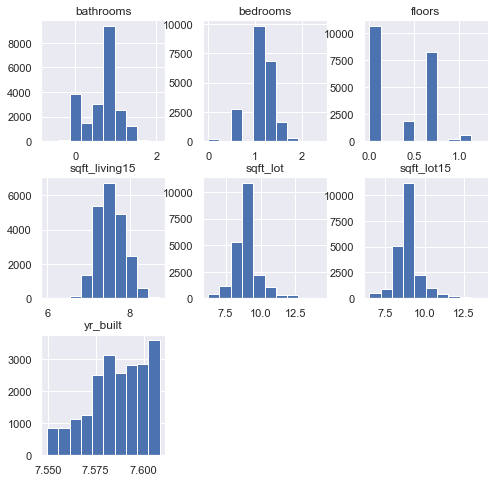

In [48]:
version1_log = pd.DataFrame([])

version1_log["bathrooms"] = np.log(df_version1["bathrooms"])
version1_log["bedrooms"] = np.log(df_version1["bedrooms"])
version1_log["floors"] = np.log(df_version1["floors"])
version1_log["sqft_living15"] = np.log(df_version1["sqft_living15"])
version1_log["sqft_lot"] = np.log(df_version1["sqft_lot"])
version1_log["sqft_lot15"] = np.log(df_version1["sqft_lot15"])
version1_log["yr_built"] = np.log(df_version1["yr_built"])

version1_log.hist(figsize  = [8,8]);

This data is now slightly more normal looking, which was the goal of doing a log transformation.

### Other Transformations
In an attempt to normalize the data further and get the scales normalized, additional transformations will be done.

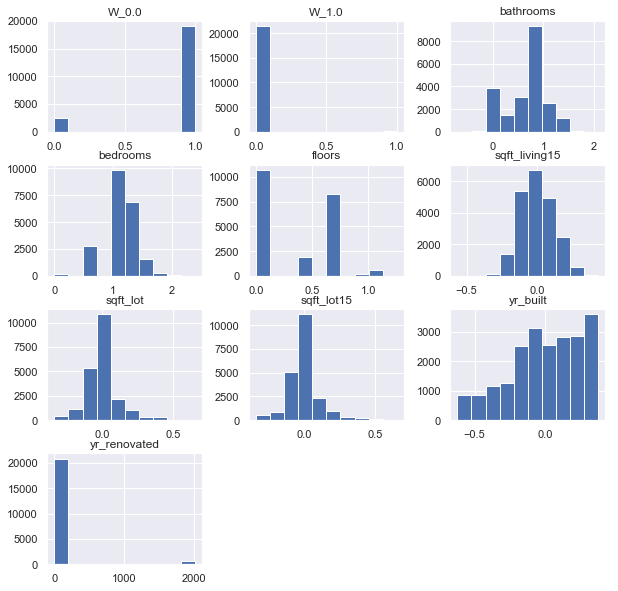

In [49]:
log_yr_built = version1_log['yr_built']
log_sqft_lot = version1_log['sqft_lot']
log_sqft_living15 = version1_log['sqft_living15']
log_sqft_lot15 = version1_log['sqft_lot15']

scaled_yr_built = (log_yr_built-np.mean(log_yr_built))/(max(log_yr_built)-min(log_yr_built))
scaled_sqft_lot = (log_sqft_lot-np.mean(log_sqft_lot))/(max(log_sqft_lot)-min(log_sqft_lot))
scaled_sqft_living15 = (log_sqft_living15-np.mean(log_sqft_living15))/(max(log_sqft_living15)-min(log_sqft_living15))
scaled_sqft_lot15 = (log_sqft_lot15-np.mean(log_sqft_lot15))/(max(log_sqft_lot15)-min(log_sqft_lot15))

v1_scaled = pd.DataFrame([])
v1_scaled["yr_built"]= scaled_yr_built
v1_scaled["sqft_lot"]= scaled_sqft_lot
v1_scaled["sqft_living15"] = scaled_sqft_living15
v1_scaled["sqft_lot15"] = scaled_sqft_lot15

v1_scaled["bedrooms"] = version1_log['bedrooms']
v1_scaled["bathrooms"] = version1_log['bathrooms']
v1_scaled["floors"] = version1_log['floors']

v1_scaled['yr_renovated'] = df_version1['yr_renovated']
v1_scaled['W_0.0'] = df_version1['W_0.0']
v1_scaled['W_1.0'] = df_version1['W_1.0']

v1_scaled.hist(figsize  = [10,10]);

### Multiple Linear Regression with Statsmodel

In [50]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [51]:
x = v1_scaled
y = df_target

x_int = sm.add_constant(x)
model = sm.OLS(y,x_int).fit()
print(model.summary())
print(model.params)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     1700.
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:24:10   Log-Likelihood:            -3.0112e+05
No. Observations:               21597   AIC:                         6.023e+05
Df Residuals:                   21586   BIC:                         6.023e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3.136e+05   1.04e+04     30.066

### Result of First Version Linear Regression 
The R2 value is 0.441 (scale of 0 to 1, 1 is "perfect").  

Next stepwise will be applied to determine which features were the highest contributors.  

The stepwise_selection code is not my own, it was copied from the lab.

In [52]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [53]:
x = v1_scaled
y = df_target

result = stepwise_selection(x, y, verbose = True)
print('resulting features:')
print(result)

Add  bathrooms                      with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  W_1.0                          with p-value 0.0
Add  floors                         with p-value 1.70865e-87
Add  yr_renovated                   with p-value 2.68346e-09
Add  sqft_lot15                     with p-value 2.68327e-05
Add  sqft_lot                       with p-value 2.16747e-06
resulting features:
['bathrooms', 'sqft_living15', 'yr_built', 'W_1.0', 'floors', 'yr_renovated', 'sqft_lot15', 'sqft_lot']


In [54]:
# Feature selection for find top 5
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(x, y)
selector.support_ 

array([ True, False,  True,  True, False,  True, False, False, False,
        True])

In [55]:
selector.ranking_

array([1, 2, 1, 1, 4, 1, 3, 6, 5, 1])

In [56]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[-391208.29386498 1367852.02291046 -183922.96777224  319785.62149145
  951401.45455082]
317170.8979427555


In [57]:
#Fit the linear regression with the 3 choose features
selected_columns = x.columns[selector.support_ ]
linreg.fit(x[selected_columns],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
yhat = linreg.predict(x[selected_columns])

In [59]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x[selected_columns].shape[1]-1)

print(r_squared)
print('-----')
print(adjusted_r_squared)

0.43083986734245816
-----
0.4307080623930214


### Result of First Version Linear Regression
The R squared and R squared adjusted value is 0.43. The top five features turned out to be: bathrooms, sqft_living15, yr_built, sqft_lot15 and W_0.0 (which had a high p-value and disqualifies it.)

### Multivariate Linear Regression - Second Round
In the EDA, there was a strong linear correlation of price with square foot living area, however, that feature was dropped in the first round because it multicorrelated so much with other features.  However, in this round it will be included for comparison sake.  Waterfront, grade and yr_renovated will also be excluded.

In [60]:
df_features.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,W_0.0,W_1.0,G_3,G_7,G_13
0,3,1.00,1180,5650,1.0,1955,0,98178,1340,5650,0,0,1.0,0.0,0.0
1,3,2.25,2570,7242,2.0,1951,1991,98125,1690,7639,1,0,0.0,1.0,0.0
2,2,1.00,770,10000,1.0,1933,0,98028,2720,8062,1,0,0.0,0.0,1.0
3,4,3.00,1960,5000,1.0,1965,0,98136,1360,5000,1,0,NaN,NaN,NaN
4,3,2.00,1680,8080,1.0,1987,0,98074,1800,7503,1,0,NaN,NaN,NaN


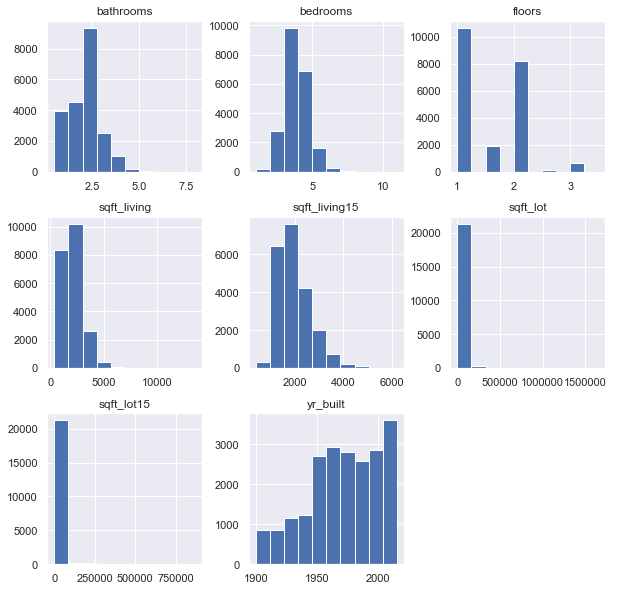

In [61]:
df_version2 = df_features.drop(['G_13','G_3','G_7','W_0.0','W_1.0','yr_renovated'],axis=1)
df_version2.hist(figsize  = [10,10]);

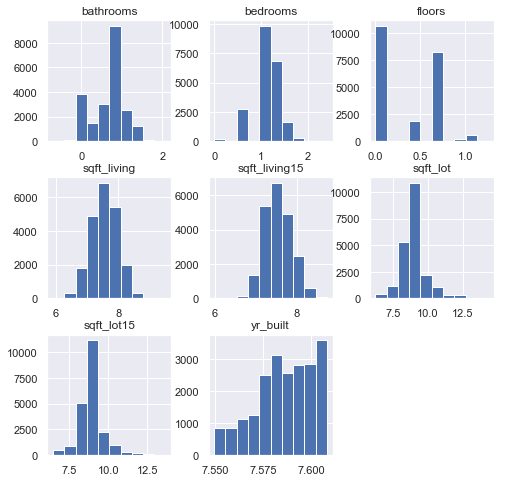

In [62]:
# Log Transformations
version2_log = pd.DataFrame([])

version2_log["bathrooms"] = np.log(df_version2["bathrooms"])
version2_log["bedrooms"] = np.log(df_version2["bedrooms"])
version2_log["floors"] = np.log(df_version2["floors"])
version2_log["sqft_living"] = np.log(df_version2["sqft_living"])
version2_log["sqft_living15"] = np.log(df_version2["sqft_living15"])
version2_log["sqft_lot"] = np.log(df_version2["sqft_lot"])
version2_log["sqft_lot15"] = np.log(df_version2["sqft_lot15"])
version2_log["yr_built"] = np.log(df_version2["yr_built"])

version2_log.hist(figsize  = [8,8]);

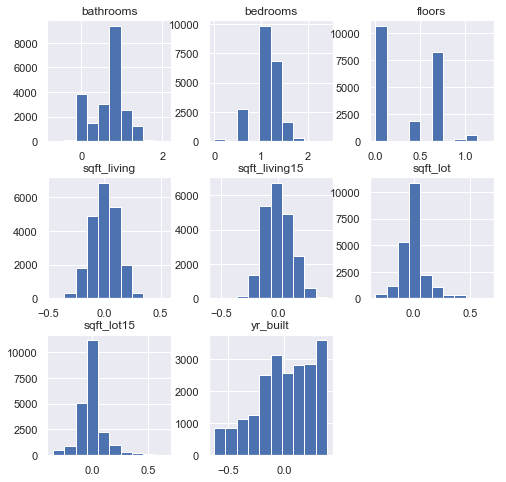

In [63]:
#More transformations to scale features
log_sqft_living = version2_log['sqft_living']
log_sqft_living15 = version2_log['sqft_living15']
log_sqft_lot = version2_log['sqft_lot']
log_sqft_lot15 = version2_log['sqft_lot15']
log_yr_built = version2_log['yr_built']


scaled_sqft_living = (log_sqft_living-np.mean(log_sqft_living))/(max(log_sqft_living)-min(log_sqft_living))
scaled_sqft_living15 = (log_sqft_living15-np.mean(log_sqft_living15))/(max(log_sqft_living15)-min(log_sqft_living15))
scaled_sqft_lot = (log_sqft_lot-np.mean(log_sqft_lot))/(max(log_sqft_lot)-min(log_sqft_lot))                                                                 
scaled_sqft_lot15 = (log_sqft_lot15-np.mean(log_sqft_lot15))/(max(log_sqft_lot15)-min(log_sqft_lot15))
scaled_yr_built = (log_yr_built-np.mean(log_yr_built))/(max(log_yr_built)-min(log_yr_built))

v2_scaled = pd.DataFrame([])
v2_scaled["sqft_living"] = scaled_sqft_living
v2_scaled["sqft_living15"] = scaled_sqft_living15
v2_scaled["sqft_lot"]= scaled_sqft_lot
v2_scaled["sqft_lot15"] = scaled_sqft_lot15                                                                 
v2_scaled["yr_built"]= scaled_yr_built

v2_scaled["bedrooms"] = version2_log['bedrooms']
v2_scaled["bathrooms"] = version2_log['bathrooms']
v2_scaled["floors"] = version2_log['floors']

v2_scaled.hist(figsize  = [8,8]);

In [64]:
# Multilinear regression with Statsmodel
x = v2_scaled
y = df_target

x_int = sm.add_constant(x)
model = sm.OLS(y,x_int).fit()
print(model.summary())
print(model.params)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     2295.
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:24:15   Log-Likelihood:            -3.0074e+05
No. Observations:               21597   AIC:                         6.015e+05
Df Residuals:                   21588   BIC:                         6.016e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.982e+05   1.15e+04     60.975

The R squared increased slightly!  With the inclusion of sqft_living, it went up to 0.46 from 0.41.

In [65]:
# Let's try step model again
x = v2_scaled
y = df_target

result = stepwise_selection(x, y, verbose = True)
print('resulting features:')
print(result)

Add  bathrooms                      with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  bedrooms                       with p-value 3.35692e-143
Add  floors                         with p-value 5.00075e-63
Add  sqft_lot                       with p-value 1.78126e-27
resulting features:
['bathrooms', 'sqft_living15', 'yr_built', 'sqft_living', 'bedrooms', 'floors', 'sqft_lot']


In [86]:
# Feature selection for find top 5
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(x, y)
selector.support_ 

array([ True,  True, False,  True,  True, False,  True, False])

In [87]:
print(selector.ranking_)
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

selected_columns = x.columns[selector.support_ ]
linreg.fit(x[selected_columns],y)
yhat = linreg.predict(x[selected_columns])


[1 1 3 1 1 2 1 4]
[ 919751.4281709   969834.50279321 -258822.59183923 -462662.91476493
  213030.36710781]
395942.3496863183


In [88]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x[selected_columns].shape[1]-1)

print(r_squared)
print('-----')
print(adjusted_r_squared)

0.42575985514994796
-----
0.4256268737815885


### Results of Model 2
The top 5 features of model 2 are: bathrooms, sqft_living15, sqft_living, bedrooms and floors.

### Multilinear Regression - Third Round
Early in the lab, I disregarded sqft_above because I thought it was redundant with sqft_living.  In this third round, it will be added to see how it plays with sqft_living.

In [66]:
df_version3 = df[['bedrooms', 'bathrooms', 'sqft_living','sqft_above','sqft_lot','floors','yr_built',
                  'yr_renovated', 'sqft_living15', 'sqft_lot15']].copy()
df_version3.head(0)

,bedrooms,bathrooms,sqft_living,sqft_above,sqft_lot,floors,yr_built,yr_renovated,sqft_living15,sqft_lot15


In [67]:
df_version3.corr()

,bedrooms,bathrooms,sqft_living,sqft_above,sqft_lot,floors,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,1.000000,0.527874,0.593182,0.492549,0.033606,0.183721,0.160748,0.018629,0.404540,0.031898
bathrooms,0.527874,1.000000,0.755758,0.686668,0.088373,0.502582,0.507173,0.047177,0.569884,0.088303
sqft_living,0.593182,0.755758,1.000000,0.876448,0.173453,0.353953,0.318152,0.051060,0.756402,0.184342
sqft_above,0.492549,0.686668,0.876448,1.000000,0.184139,0.523989,0.424037,0.020645,0.731767,0.195077
sqft_lot,0.033606,0.088373,0.173453,0.184139,1.000000,-0.004814,0.052946,0.004979,0.144763,0.718204
floors,0.183721,0.502582,0.353953,0.523989,-0.004814,1.000000,0.489193,0.003793,0.280102,-0.010722
yr_built,0.160748,0.507173,0.318152,0.424037,0.052946,0.489193,1.000000,-0.202555,0.326377,0.070777
yr_renovated,0.018629,0.047177,0.051060,0.020645,0.004979,0.003793,-0.202555,1.000000,0.000683,0.004286
sqft_living15,0.404540,0.569884,0.756402,0.731767,0.144763,0.280102,0.326377,0.000683,1.000000,0.183515
sqft_lot15,0.031898,0.088303,0.184342,0.195077,0.718204,-0.010722,0.070777,0.004286,0.183515,1.000000


In [68]:
abs(df_version3.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_above,sqft_lot,floors,yr_built,yr_renovated,sqft_living15,sqft_lot15
bedrooms,True,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False
sqft_living,False,True,True,True,False,False,False,False,True,False
sqft_above,False,False,True,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False
yr_built,False,False,False,False,False,False,True,False,False,False
yr_renovated,False,False,False,False,False,False,False,True,False,False
sqft_living15,False,False,True,False,False,False,False,False,True,False
sqft_lot15,False,False,False,False,False,False,False,False,False,True


In [69]:
df_version3.head()

,bedrooms,bathrooms,sqft_living,sqft_above,sqft_lot,floors,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,3,1.00,1180,1180,5650,1.0,1955,0,1340,5650
1,3,2.25,2570,2170,7242,2.0,1951,1991,1690,7639
2,2,1.00,770,770,10000,1.0,1933,0,2720,8062
3,4,3.00,1960,1050,5000,1.0,1965,0,1360,5000
4,3,2.00,1680,1680,8080,1.0,1987,0,1800,7503


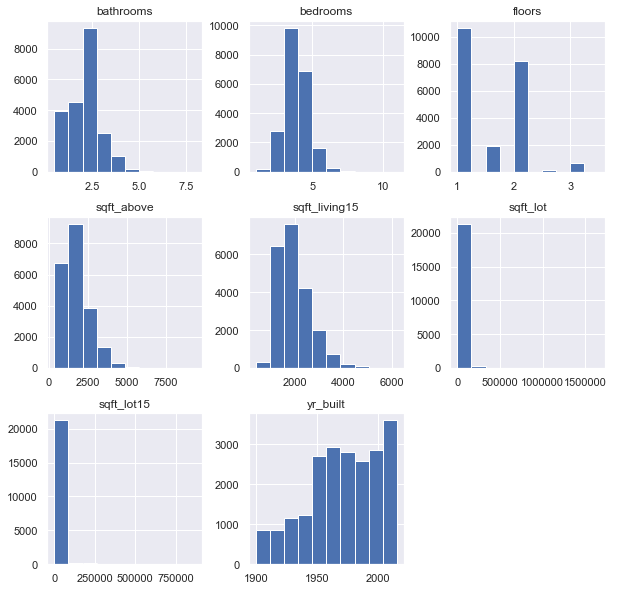

In [70]:
#I will drop sqft_living and proceed
df_version3 = df_version3.drop(['sqft_living','yr_renovated'],axis=1)
df_version3.head()
df_version3.hist(figsize  = [10,10]);

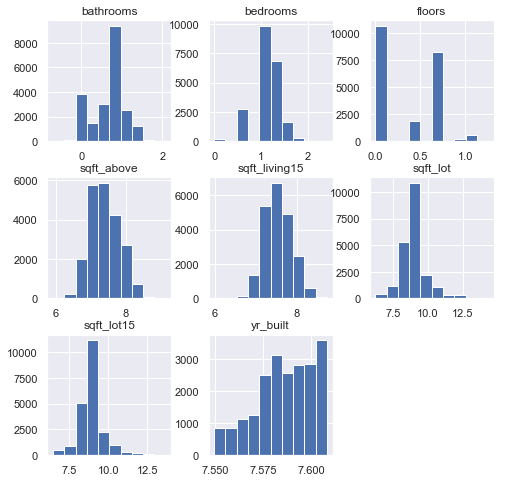

In [71]:
# Log Transformations
version3_log = pd.DataFrame([])

version3_log["bathrooms"] = np.log(df_version3["bathrooms"])
version3_log["bedrooms"] = np.log(df_version3["bedrooms"])
version3_log["floors"] = np.log(df_version3["floors"])
version3_log["sqft_above"] = np.log(df_version3["sqft_above"])
version3_log["sqft_living15"] = np.log(df_version3["sqft_living15"])
version3_log["sqft_lot"] = np.log(df_version3["sqft_lot"])
version3_log["sqft_lot15"] = np.log(df_version3["sqft_lot15"])
version3_log["yr_built"] = np.log(df_version3["yr_built"])

version3_log.hist(figsize  = [8,8]);

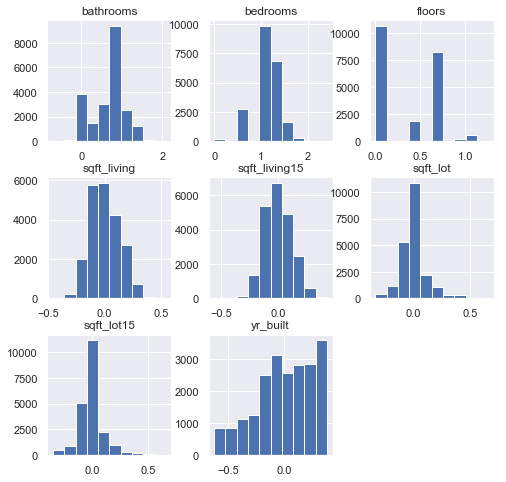

In [72]:
#More transformations to scale features
log_sqft_above = version3_log['sqft_above']
log_sqft_living15 = version3_log['sqft_living15']
log_sqft_lot = version3_log['sqft_lot']
log_sqft_lot15 = version3_log['sqft_lot15']
log_yr_built = version3_log['yr_built']


scaled_sqft_above = (log_sqft_above-np.mean(log_sqft_above))/(max(log_sqft_above)-min(log_sqft_above))
scaled_sqft_living15 = (log_sqft_living15-np.mean(log_sqft_living15))/(max(log_sqft_living15)-min(log_sqft_living15))
scaled_sqft_lot = (log_sqft_lot-np.mean(log_sqft_lot))/(max(log_sqft_lot)-min(log_sqft_lot))                                                                 
scaled_sqft_lot15 = (log_sqft_lot15-np.mean(log_sqft_lot15))/(max(log_sqft_lot15)-min(log_sqft_lot15))
scaled_yr_built = (log_yr_built-np.mean(log_yr_built))/(max(log_yr_built)-min(log_yr_built))

v3_scaled = pd.DataFrame([])
v3_scaled["sqft_living"] = scaled_sqft_above
v3_scaled["sqft_living15"] = scaled_sqft_living15
v3_scaled["sqft_lot"]= scaled_sqft_lot
v3_scaled["sqft_lot15"] = scaled_sqft_lot15                                                                 
v3_scaled["yr_built"]= scaled_yr_built

v3_scaled["bedrooms"] = version3_log['bedrooms']
v3_scaled["bathrooms"] = version3_log['bathrooms']
v3_scaled["floors"] = version3_log['floors']

v3_scaled.hist(figsize  = [8,8]);

In [73]:
# Multilinear regression with Statsmodel
x = v3_scaled
y = df_target

x_int = sm.add_constant(x)
model = sm.OLS(y,x_int).fit()
print(model.summary())
print(model.params)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     2054.
Date:                Tue, 20 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:24:20   Log-Likelihood:            -3.0128e+05
No. Observations:               21597   AIC:                         6.026e+05
Df Residuals:                   21588   BIC:                         6.026e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.338e+05   1.06e+04     50.468

And this R squared decreased slightly from the second model. 

### Continuation of Model 2: Regression Model Validation
The second model had the highest R squared.  

It's time to train the model

In [89]:
v2_scaled.head(0) #bathrooms, sqft_living15, sqft_living, bedrooms and floors. 

,sqft_living,sqft_living15,sqft_lot,sqft_lot15,yr_built,bedrooms,bathrooms,floors


In [91]:
# Create new dataframe with top 5 features from model 2
v2_top5 = v2_scaled.drop(['sqft_lot','sqft_lot15','yr_built'], axis=1)
v2_top5.head()

,sqft_living,sqft_living15,bedrooms,bathrooms,floors
0,-0.132629,-0.123524,1.098612,0.000000,0.000000
1,0.083597,-0.038984,1.098612,0.810930,0.693147
2,-0.251210,0.134390,0.693147,0.000000,0.000000
3,0.008328,-0.118127,1.386294,1.098612,0.000000
4,-0.034493,-0.016012,1.098612,0.693147,0.000000


In [92]:
from sklearn.model_selection import train_test_split
X = v2_top5
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

17277 4320 17277 4320


In [93]:
# Apply my model to the trained set (17,277 rows of information)

# Import the linear regression model
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

# Fit the model to the train data
linreg.fit(X_train, y_train)

#Calculate predictions on test and train set
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

#Calculatate the residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

#Calculate Mean Squared Error
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

In [94]:
print('Train Mean Squarred Error:', round(train_mse,2))
print('Test Mean Squarred Error: ', round(test_mse,2))

Train Mean Squarred Error: 82122201233.42
Test Mean Squarred Error:  72923820529.5


In [95]:
# Cross Validation using scikit-learn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring="neg_mean_squared_error")
cv_5_results

array([-9.12531706e+10, -8.64762775e+10, -6.95415741e+10, -7.22326432e+10,
       -8.33148897e+10])

### Summary of Regression Model 2